# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable.
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [1]:
def data_parser():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  # ** INCONSISTENCIES: Countries with no name, Years in the future(haven't happened yet), unneccesary information such as Life expectancy after age 85**
  with open("DEM_info.csv", 'r') as file:
    reader = csv.reader(file)
    country_dict = {}
    header = next(reader)
    for row in reader:
        # Filter out regions/non countries from the list by making sure IS03_Code exists
        if row[header.index("ISO3_code")] and row[header.index("Time")] == '2024':
            innerdict = {}
            country_name = row[header.index("Location")]
            innerdict['Population Density'] = row[header.index('PopDensity')]
            innerdict['CBR'] = row[header.index('CBR')]
            innerdict['Median Age'] = row[header.index('MedianAgePop')]
            innerdict['Population Growth Rate'] = row[header.index('PopGrowthRate')]
            innerdict['CDR'] = row[header.index('CDR')]
            innerdict['Life Expectancy'] = row[header.index('LEx')]
            innerdict['Life Expectancy 65+'] = row[header.index('LE65')]
            innerdict['Infant Mortality Rate'] = row[header.index('IMR')]
            country_dict[country_name] = innerdict
  #pprint(country_dict)

  # Output dictionaries into csv file
  with open("Cleaned_DEM_Info.csv", 'w') as file:
    fieldnames = ['Country', 'CBR', 'CDR', 'Infant Mortality Rate', 'Life Expectancy', 'Life Expectancy 65+', 'Median Age', 'Population Density', 'Population Growth Rate']
    writer = csv.DictWriter(file, fieldnames= fieldnames)
    writer.writeheader()
    for country, data in country_dict.items():
      row = {'Country': country}
      row.update(data)
      writer.writerow(row)




############ Function Call ############
data_parser()

## Web Collection Requirement \#1


In [2]:
def web_parser1():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  #key = OfLGQMwlrca75zVfg0qRXh9aAhYjCOFs
  # API endpoint URL
  url = 'https://restcountries.com/v3.1/all'
  # name=input("What country would you like to look at?")
  # country_url = f'https://restcountries.com/v3.1/name/{name}'
  #print(country_url)


  response = requests.get(url)

  # Check if the request was successful (status code 200)
  if response.status_code == 200:
      data = response.json()
      #pprint(data)
      if data:
          countries_dict = {}
          off_countries_dict = {}
          for country in data:
              off_country_name = country['name']['official']
              comm_country_name = country['name']['common']
              currencies_list = country.get('currencies', {})
              items = currencies_list.items()
              for items_code, items_info in items:
                  countries_dict[comm_country_name] = items_info.get("name")
                  off_countries_dict[off_country_name] = items_info.get("name")
          #pprint(countries_dict)
  else:
      print(f"Error fetching data: {response.status_code} - {response.reason}")

  # Output dictionaries to the csv file
  with open("Cleaned_DEM_Info.csv", 'r') as file:
    reader = csv.DictReader(file)
    rows = list(reader)
    fieldnames = reader.fieldnames + ['Currency']

  with open("Cleaned_DEM_Info.csv", 'w') as file:
    writer = csv.DictWriter(file, fieldnames= fieldnames)
    writer.writeheader()
    for row in rows:
      # CLEANED DATA: countries with official names vs common names, and others
      try:
        country = row['Country']
        if country in countries_dict:
          row['Currency'] = countries_dict[country]
          writer.writerow(row)
        elif country in off_countries_dict:
          row['Currency'] = off_countries_dict[country]
          writer.writerow(row)
        else:
          for name in countries_dict.keys():
            if name in country:
              row['Currency'] = countries_dict[name]
              writer.writerow(row)
              break
      except Exception as e:
        row['Currency'] = "NA"
        writer.writerow(row)




############ Function Call ############
web_parser1()

## Web Collection Requirement #2

In [3]:
def web_parser2():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  url = 'https://www.x-rates.com/table/?from=USD&amount=1'
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  tags = soup.find_all("div", {"class" : "grid__cell main"})
  #print(tags)
  table = soup.find_all("table", {"class" : "tablesorter ratesTable"})
  #print(table)
  html_headers = table[0].find_all("th")
  #print(html_headers)
  headers = re.findall(r'\">(.*?)</th', str(html_headers))
  list_country_info = [td.text.strip().split("\n") for td in table[0].find_all("tr")[1:]]
  #pprint(list_country_info)
  #print(len(list_country_info))#-------> 52 countries()
  money_dict = {}
  for country in list_country_info:
      money_dict[country[0]] = country[1:]
  #pprint(money_dict)
  cash_dict = {}
  for alist in list_country_info:
    short_name = alist[0][0:4]
    exchg_rates = alist[1:]
    cash_dict[short_name] = exchg_rates

  # Read the data from the file
  with open("Cleaned_DEM_Info.csv", 'r') as file:
      reader = csv.DictReader(file)
      rows = list(reader)
      fieldnames = reader.fieldnames + ['1USD', 'inv.USD']

  # Write the updated data back to the file
  with open("Cleaned_DEM_Info.csv", 'w', newline='') as file:
      writer = csv.DictWriter(file, fieldnames=fieldnames)
      writer.writeheader()
      # short_keys = [key[0:4] for key in money_dict.keys()]
      #print(short_keys)
      for row in rows:
          try:
              currency = row['Currency']
              #print(currency)
              short_currency = currency[0:4]
              #print(short_currency)
              if currency == 'United States dollar':
                  row['1USD'] = '1'
                  row['inv.USD'] = '1'
                  writer.writerow(row)
                  continue
              if short_currency == 'Sout':
                  #row['1USD'] = reverse_dict[reverse_currency][0]
                  #row['inv.USD'] = reverse_dict[reverse_currency][1]

                  if 'won' in str(currency):
                      row['1USD'] = money_dict['South Korean Won'][0]
                      row['inv.USD'] = money_dict['South Korean Won'][1]
                      writer.writerow(row)
                      continue
                  if 'rand' in str(currency):
                      row['1USD'] = money_dict['South African Rand'][0]
                      row['inv.USD'] = money_dict['South African Rand'][1]
                      writer.writerow(row)
                      continue
                  if 'pound' in str(currency):
                      row['1USD'] = "N/A"
                      row['inv.USD'] = "N/A"
                      writer.writerow(row)
                      continue
              if short_currency == 'Mala':
                if 'ringgit' in str(currency):
                  row['1USD'] = money_dict['Malaysian Ringgit'][0]
                  row['inv.USD'] = money_dict['Malaysian Ringgit'][1]
                  writer.writerow(row)
                  continue
                else:
                  row['1USD'] = "N/A"
                  row['inv.USD'] = "N/A"
                  writer.writerow(row)
                  continue

              if short_currency in list(cash_dict.keys()):
                  row['1USD'] = cash_dict[short_currency][0]
                  row['inv.USD'] = cash_dict[short_currency][1]
              else:
                  row['1USD'] = "N/A"
                  row['inv.USD'] = "N/A"
          except Exception as e:
              row['1USD'] = "N/A"
              row['inv.USD'] = "N/A"
          writer.writerow(row)





############ Function Call ############
web_parser2()

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1.

2.

3.

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2022_Demographic_Indicators_Medium.zip
*   Web Collection #1 Source: https://www.x-rates.com/table/?from=USD&amount=1
*   Web Collection #2 Source: https://restcountries.com/v3.1/all



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function.

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [14]:
def insight1():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)
  best_value_df = cleaned_df.tail(30)
  print(best_value_df)





############ Function Call ############
insight1()

                           Country     CBR     CDR  Infant Mortality Rate  \
83                      San Marino   5.915   9.651                 2.2736   
84                          Latvia   8.564  15.695                 2.7177   
85                       Lithuania   9.270  14.320                 2.4905   
86                         Estonia   9.671  11.896                 1.6882   
87                        Slovakia  10.245   9.617                 3.9280   
88                         Mayotte  31.246   2.343                 3.3868   
89                         Andorra   7.025   6.487                 5.0470   
90                         Croatia   8.305  13.353                 2.8567   
91                          Greece   7.320  11.591                 2.8612   
92                           Italy   6.882  10.887                 1.9958   
93   Kosovo (under UNSC res. 1244)  11.255   5.918                 5.8288   
94                           Malta   9.041   7.600                 5.0850   

### Insight 1 Explanation

Estonia was the most similar country to the United States when looking at all of these statistics together. This table was sorted by currency valuation, but in all demographic categories we looked at, Estonia was very close to the US. It is a little bit surprising that such a small country has the closest demographic statistics as the US, but it is Western European and uses the Euro for currency. This is a stronger currency than the dollar, so it supports our hypothesis.

In [17]:
def insight2():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)
  worst_value_df = cleaned_df.head(10)
  print(worst_value_df)





############ Function Call ############
insight2()

                              Country     CBR     CDR  Infant Mortality Rate  \
0  Venezuela (Bolivarian Republic of)  16.099   7.387                13.1135   
1          Iran (Islamic Republic of)  12.437   5.117                 9.1190   
2                           Indonesia  15.774   7.618                17.0883   
3                            Colombia  13.414   5.592                10.0243   
4                   Republic of Korea   5.618   7.109                 2.1910   
5                               Chile  11.314   6.491                 5.3690   
6                           Argentina  13.539   7.502                 8.1791   
7                          Kazakhstan  19.585   7.945                 7.5249   
8                             Hungary   9.997  12.664                 2.8743   
9                           Sri Lanka  13.436   7.500                 5.1460   

   Life Expectancy  Life Expectancy 65+  Median Age  Population Density  \
0          73.0718              16.2136     

### Insight 2 Explanation

Venezuela had by far the worst valuation compared to 1USD. You can see it is over 3 million. This matches our hypothesis as they have a very low life expectancy. They also have high infant mortality and low median age. These are all signs of a country with a low standard of living.

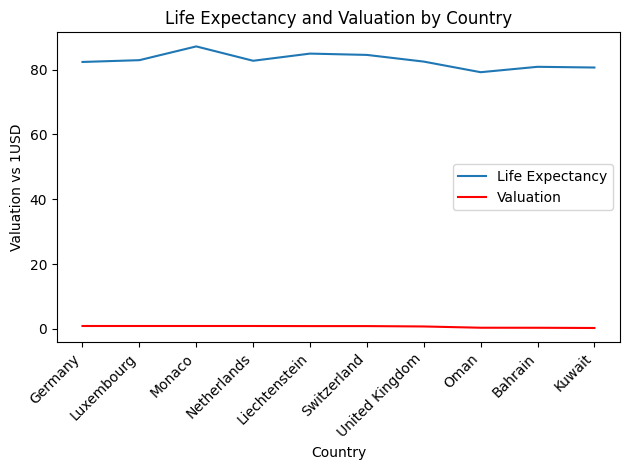

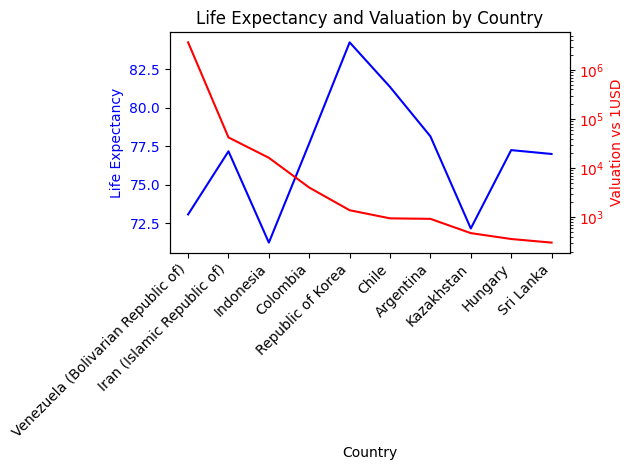

In [19]:
def insight3():
    import csv
    from pprint import pprint
    import requests
    from bs4 import BeautifulSoup
    import re
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
    cleaned_df = uncleaned_df.dropna()
    cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
    cleaned_df.reset_index(drop=True, inplace=True)

    best_value_df = cleaned_df.tail(30)
    worst_value_df = cleaned_df.head(10)

    ax = plt.gca()

    best_value_df = cleaned_df.tail(10)

    # Plot life expectancy
    best_value_df.plot(kind='line', x='Country', y='Life Expectancy', label='Life Expectancy', ax=ax)

    # Plot valuation
    best_value_df.plot(kind='line', x='Country', y='1USD', label='Valuation', color='red', ax=ax)

    # Set labels and title
    plt.xlabel('Country')
    plt.ylabel('Valuation vs 1USD')
    plt.title('Life Expectancy and Valuation by Country')
    plt.legend()
    plt.xticks(rotation=45, ha='right')

    # Force showing all x-axis labels
    ax.set_xticks(np.arange(len(best_value_df)))
    ax.set_xticklabels(best_value_df['Country'], rotation=45, ha='right')
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
    # Show the plot
    plt.show()

    #Second Graph
    fig, ax1 = plt.subplots()
    # Plot life expectancy on primary y-axis
    ax1.plot(worst_value_df['Country'], worst_value_df['Life Expectancy'], label='Life Expectancy', color='blue')
    ax1.set_xlabel('Country')
    ax1.set_ylabel('Life Expectancy', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a secondary y-axis for valuation
    ax2 = ax1.twinx()
    ax2.plot(worst_value_df['Country'], worst_value_df['1USD'], label='Valuation', color='red')
    ax2.set_ylabel('Valuation vs 1USD', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    ax2.set_yscale('log')
    # Force showing all x-axis labels
    ax1.set_xticks(range(len(worst_value_df)))
    ax1.set_xticklabels(worst_value_df['Country'], rotation=45, ha='right')

    # Set title
    plt.title('Life Expectancy and Valuation by Country')

    # Ensure everything fits
    fig.tight_layout()
    plt.show()



############ Function Call ############
insight3()

### Insight 3 Explanation

Our original hypothesis was that a high currency valuation compared to the United States would likely indicate a low life expectancy. We graphed this using seperate graphs. We used the top 10(first graph) and the bottom 30(second graph) seperately, and there were some outliers, but the trend mostly followed our prediction. Republic of Korea is clearly an outlier as they have an extremely high life expectancy and currency valuation. However, the rest of the graph shows an average increase in life expectancy as the valuations get closer to the USD. You can see that the 10 countries with the worst currency valuations have much worse life expectancy than the top 10 best currency valuations.

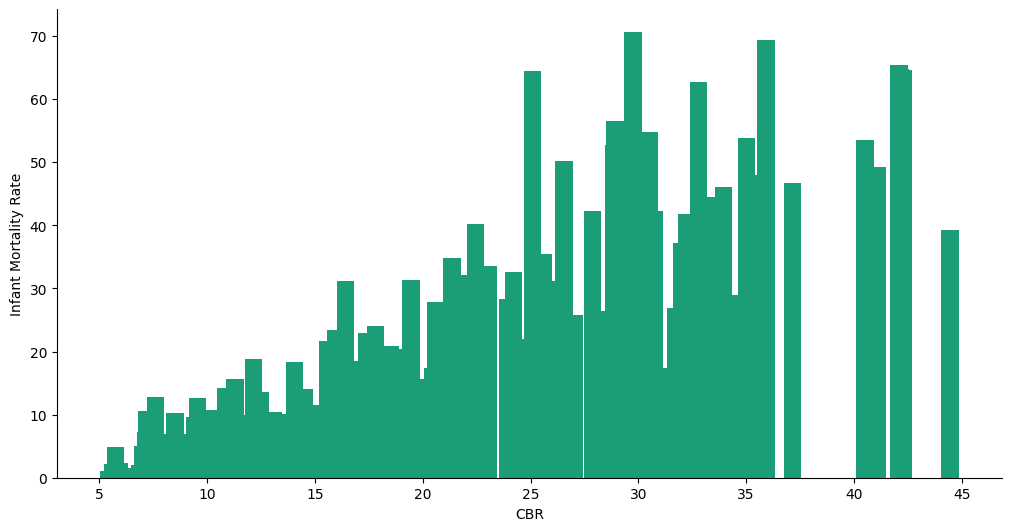

In [20]:
def insight4():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)

  # @title CBR vs Infant Mortality Rate
  from matplotlib import pyplot as plt
  import seaborn as sns

  cbr_df = uncleaned_df.sort_values(by='CBR', ascending=True)
  cbr_df.reset_index(drop=True, inplace=True)

  def _plot_series(series, series_name, series_index=0):
      palette = list(sns.palettes.mpl_palette('Dark2'))
      xs = series['CBR']
      ys = series['Infant Mortality Rate']

      plt.bar(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
  df_sorted = cbr_df.sort_values('CBR', ascending=True)
  _plot_series(df_sorted, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel('CBR')
  _ = plt.ylabel('Infant Mortality Rate')

  plt.show()







############ Function Call ############
insight4()

### Insight 4 Explanation

We used matplotlib and seaborn to create this graph showing infant mortality rate compared to crude birth rate. There are a few outliers here, but overall the data shows a positive correlation between CBR and IMR. This is most likely because if a lot of newborn babies are dying, they need to have more, so there will be a higher chance of one surviving. The countries with high CBR and IMR tend to be countries with lower standard of livings.

In [21]:
def insight5():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import plotly.express as px
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)
  LE65_df = uncleaned_df.sort_values(by='Life Expectancy 65+', ascending=True)
  LE65_df.reset_index(drop=True, inplace=True)
  LE65_df
  fig = px.scatter(LE65_df, x='Median Age', y='Life Expectancy 65+',
                  title='Scatter Plot of Median Age vs Life Expectancy 65+')
  fig.update_layout(xaxis_title='Median Age', yaxis_title='Life Expectancy 65+')
  fig.show()





############ Function Call ############
insight5()

### Insight 5 Explanation

Here, we used Plotly, another python plotting/graphing module that we learned about in class. This scatter plot shows a clear, strong positive correlation between median age and life expectancy over 65. Life expectancy over 65 shows how long people will live if they have already made it to 65. It helps take out of account freak accident deaths, childhood deaths, etc that bring the life expectancy average down. This allowed us to conclude that countries with a older populations will have people that live significantly longer. This is partly because these two statistics benefit from each other, but it also is because higher standard of living countries tend to have better medicine and medical practices that keep elderly people alive longer.

## Data Visualizations

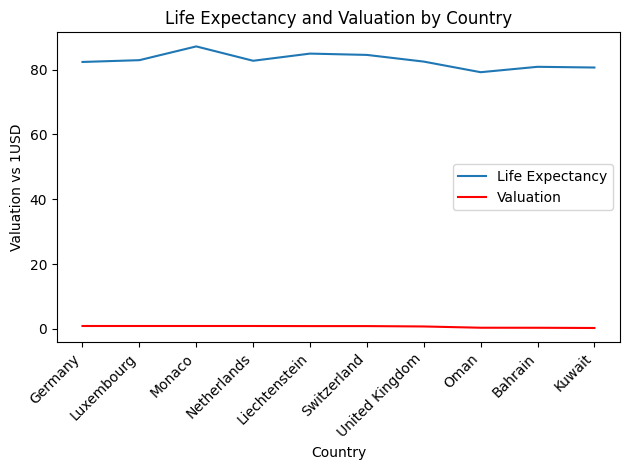

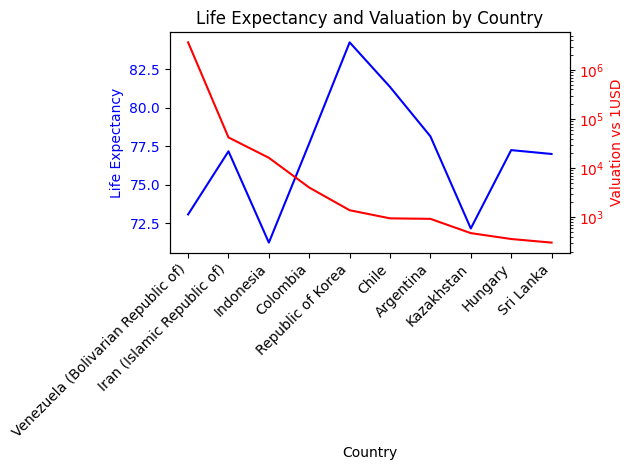

In [23]:
def visual1():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)

  best_value_df = cleaned_df.tail(30)
  worst_value_df = cleaned_df.head(10)

  ax = plt.gca()

  best_value_df = cleaned_df.tail(10)

  # Plot life expectancy
  best_value_df.plot(kind='line', x='Country', y='Life Expectancy', label='Life Expectancy', ax=ax)

  # Plot valuation
  best_value_df.plot(kind='line', x='Country', y='1USD', label='Valuation', color='red', ax=ax)

  # Set labels and title
  plt.xlabel('Country')
  plt.ylabel('Valuation vs 1USD')
  plt.title('Life Expectancy and Valuation by Country')
  plt.legend()
  plt.xticks(rotation=45, ha='right')

  # Force showing all x-axis labels
  ax.set_xticks(np.arange(len(best_value_df)))
  ax.set_xticklabels(best_value_df['Country'], rotation=45, ha='right')
  plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
  # Show the plot
  plt.show()

  #Second Graph
  fig, ax1 = plt.subplots()
  # Plot life expectancy on primary y-axis
  ax1.plot(worst_value_df['Country'], worst_value_df['Life Expectancy'], label='Life Expectancy', color='blue')
  ax1.set_xlabel('Country')
  ax1.set_ylabel('Life Expectancy', color='blue')
  ax1.tick_params(axis='y', labelcolor='blue')

  # Create a secondary y-axis for valuation
  ax2 = ax1.twinx()
  ax2.plot(worst_value_df['Country'], worst_value_df['1USD'], label='Valuation', color='red')
  ax2.set_ylabel('Valuation vs 1USD', color='red')
  ax2.tick_params(axis='y', labelcolor='red')

  # Rotate x-axis labels
  plt.xticks(rotation=45, ha='right')
  ax2.set_yscale('log')
  # Force showing all x-axis labels
  ax1.set_xticks(range(len(worst_value_df)))
  ax1.set_xticklabels(worst_value_df['Country'], rotation=45, ha='right')

  # Set title
  plt.title('Life Expectancy and Valuation by Country')

  # Ensure everything fits
  fig.tight_layout()
  plt.show()





############ Function Call ############
visual1()

### Visualization 1 Explanation

This is the code we used for our visualization to help support Insight #3 which is further explained in that section. The graph shows an average increase in life expectancy as the valuations get closer to the USD. You can see that the 10 countries with the worst currency valuations have much worse life expectancy than the top 10 best currency valuations.

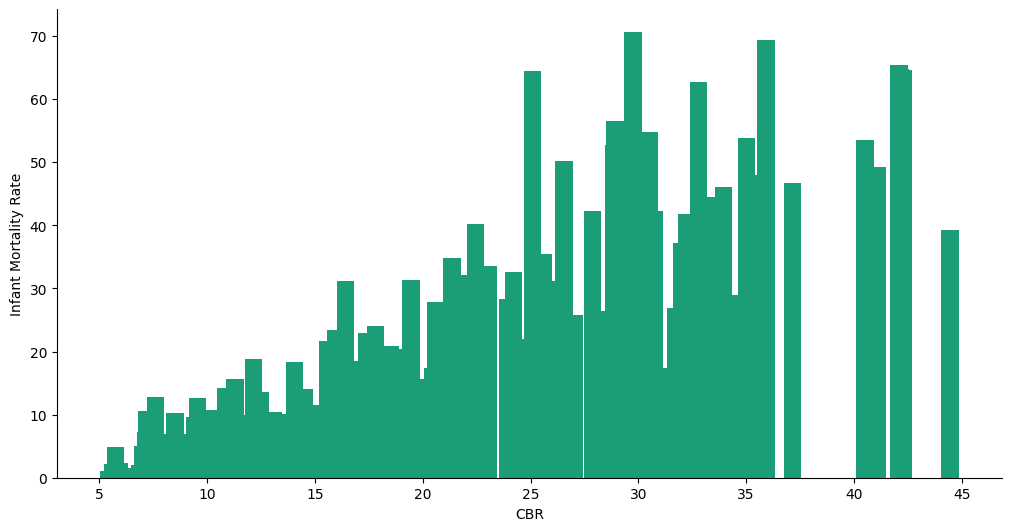

In [24]:
def visual2():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)

  # @title CBR vs Infant Mortality Rate
  from matplotlib import pyplot as plt
  import seaborn as sns

  cbr_df = uncleaned_df.sort_values(by='CBR', ascending=True)
  cbr_df.reset_index(drop=True, inplace=True)

  def _plot_series(series, series_name, series_index=0):
      palette = list(sns.palettes.mpl_palette('Dark2'))
      xs = series['CBR']
      ys = series['Infant Mortality Rate']

      plt.bar(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
  df_sorted = cbr_df.sort_values('CBR', ascending=True)
  _plot_series(df_sorted, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel('CBR')
  _ = plt.ylabel('Infant Mortality Rate')

  plt.show()





############ Function Call ############
visual2()

### Visualization 2 Explanation

This is the code we used for our visualization to help support Insight #4 which is further explained in that section. We used matplotlib and seaborn to create this graph showing infant mortality rate compared to crude birth rate. There are a few outliers here, but overall the data shows a positive correlation between CBR and IMR.

In [29]:
def visual3():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import plotly.express as px
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)
  LE65_df = uncleaned_df.sort_values(by='Life Expectancy 65+', ascending=True)
  LE65_df.reset_index(drop=True, inplace=True)
  LE65_df
  fig = px.scatter(LE65_df, x='Median Age', y='Life Expectancy 65+',
                  title='Scatter Plot of Median Age vs Life Expectancy 65+')
  fig.update_layout(xaxis_title='Median Age', yaxis_title='Life Expectancy 65+')
  fig.show()





############ Function Call ############
visual3()

### Visualization 3 Explanation

This is the code we used for our visualization to help support Insight #5 which is further explained in that section. Here, we used Plotly, another python plotting/graphing module that we learned about in class. This scatter plot shows a clear, strong positive correlation between median age and life expectancy over 65. Also, it is interactive which allows you to hover over a point and see its x and y values. You can also zoom in and out by dragging your mouse.

## Summary Files

In [28]:
def summary1():
  import csv
  from pprint import pprint
  import requests
  from bs4 import BeautifulSoup
  import re
  import os
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import plotly.express as px
  uncleaned_df = pd.read_csv('Cleaned_DEM_Info.csv')
  cleaned_df = uncleaned_df.dropna()
  cleaned_df = cleaned_df.sort_values(by='1USD', ascending=False)
  cleaned_df.reset_index(drop=True, inplace=True)
  euro_df = cleaned_df.groupby('Currency')['Life Expectancy'].mean().reset_index()
  euro_df.sort_values(by='Life Expectancy', ascending=True, inplace = True)
  euro_df.reset_index(drop=True, inplace=True)
  print(euro_df)
  euro_df.to_excel('euro_df.xlsx', index=False)





############ Function Call ############
summary1()

                       Currency  Life Expectancy
0            South African rand        61.929625
1                 Botswana pula        66.200300
2               Pakistani rupee        67.476400
3           Mauritanian ouguiya        69.115500
4            Turkmenistan manat        69.673700
5                Nepalese rupee        71.065400
6             Indonesian rupiah        71.239700
7             Kazakhstani tenge        72.158600
8               Philippine peso        72.399600
9                  Indian rupee        72.518350
10  Venezuelan bolívar soberano        73.071800
11                 Libyan dinar        73.444300
12            Australian dollar        74.120300
13                Russian ruble        74.721000
14         United States dollar        74.741056
15   Trinidad and Tobago dollar        75.027500
16                 Mexican peso        75.232400
17              Mauritian rupee        75.835100
18                Bulgarian lev        75.905200
19               Bra

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   https://seaborn.pydata.org/
*   https://plotly.com/python/



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://youtu.be/A3_bwKOgD7Q


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
